## Model Comparisons

After using the 3 machine learning models (Neural Network, Decision Tree and Support Vector Machines) to predict bankruptcy based on our dataset, we compared and evaluated their results using these two metrics:

1. Area Under Curve (AUC) of the Receiver Operating Characteristic (ROC) Graph

    **Evaluation**

    Upon comparison of all ROC graphs, we can conclude that models trained using the full dataset (Model 1) with performed better than those trained with only the top 10 datsets (Model 2), with the AUC being consistenly higher for Model 1 for all 3 machine learning models.

    Based on AUC, we can also conclude that the the **Neural Network is the best classifier model**, followed by SVM, and lastly Decision Tree, with AUCs of **0.9869**, **0.9794** and **0.9665** respectively for their Model 1. 

2. Accuracy of model obtained from the Classification Report of each model

    **Evaluation**

    Accuracy of each model:

    NN (all): 0.9527

    NN (top 10): 0.8549

    DT (all): 0.9663

    DT (top 10): 0.9587

    SVM (all): 0.9455

    SVM (top 10): 0.8739

    Just like the AUC, we can conclude that models trained using the full dataset (Model 1) with performed better than those trained with only the top 10 datasets (Model 2). Overall, the Decision Tree Model managed to achieve the highest accuracy.

#### Conclusion

Based on our findings, the top 2 models to use to predict bankruptcy based on our dataset is the Neural Network model, with the highest AUC, and the Decision Tree, with the highest accuracy.

Comparing the two, it can be deduced that the Neural Network model has a better ability to distinguish between positive and negative cases (higher AUC), but may make more errors overall (lower accuracy). This could be because the model has a higher sensitivity (i.e., it correctly identifies more true positives) at the expense of lower specificity (i.e., it incorrectly classifies more negatives as positives).

If the goal is to identify as many bankrupt firms as possible while keeping the number of false positives (non-bankrupt firms classified as bankrupt) relatively low, then a model with a higher AUC (better ability to distinguish between positive and negative cases) might be more appropriate.

On the other hand, if the goal is to minimize the overall error rate (i.e., correctly classify the maximum number of firms), then a model with higher accuracy might be more appropriate.

Looking at the costs between false positives and false negatives in the context of predicting bankruptcy, we conclude that the **Neural Network model would be the best choice**. This is because the cost of false negatives (classifying a bankrupt firm as non-bankrupt) is likely to be much higher than the cost of false positives (classifying a non-bankrupt firm as bankrupt). Thus, a model with higher sensitivity (higher true positive rate) and higher AUC might be preferred to minimize the risk of missing bankrupt firms.

Thus, the Neural Network model is the best model for predicting bankruptcy. 

### 1. Comparing ROC and AUC of each model

ROC is a graphical representation of a binary classifier's performance. The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds. A perfect classifier has an ROC curve that passes through the upper-left corner of the graph, and a random classifier has an ROC curve that is a diagonal line from the bottom-left corner to the top-right corner.

AUC is the area under the ROC curve, and it provides a measure of the classifier's performance over all possible thresholds. AUC ranges from 0 to 1, with 0.5 indicating a random classifier and 1 indicating a perfect classifier. AUC is a commonly used metric for binary classification problems because it is insensitive to class imbalance and threshold selection.

##### a) Importing Libraries and models previously obtained 

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#importing models from the 3 notebooks

#nnm
%store -r model_upsample_all
%store -r fpr_nn
%store -r tpr_nn
%store -r roc_auc_nn
%store -r nn_report

%store -r model_upsample_top10
%store -r fpr_nn_top10
%store -r tpr_nn_top10
%store -r roc_auc_nn_top10
%store -r nn_report_top10

#dt model
%store -r dt_model
%store -r roc_auc_dt
%store -r fpr_dt
%store -r tpr_dt
%store -r dt_report

%store -r dt_model_top10
%store -r roc_auc_dt_top10
%store -r fpr_dt_top10
%store -r tpr_dt_top10
%store -r dt_report_top10

#svm models
%store -r fpr_svm
%store -r tpr_svm
%store -r svm_model
%store -r roc_auc_svm
%store -r svm_report

%store -r fpr_svm_top10
%store -r tpr_svm_top10
%store -r svm_model_top10
%store -r roc_auc_svm_top10
%store -r svm_report_top10

In [159]:
# Load the data from CSV file
df = pd.read_csv("upsampled_bankruptcy.csv")

# Split the data into training and testing sets for top 10 variables based on correlation with bankruptcy
corr_matrix = df.corr()
num_features = 10
corr_with_bankrupt = corr_matrix["Bankrupt?"].abs().sort_values(ascending=False)
top_corr_features = corr_with_bankrupt[1:num_features+1].index.tolist()
df_top10_upsampled = df[top_corr_features]


# Splitting data into test and training sets (all 95 variables)
df["Bankrupt?"].value_counts()
X_upsample = df.drop("Bankrupt?", axis=1)
y_upsample = df["Bankrupt?"]

X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample = train_test_split(X_upsample, y_upsample, test_size=0.2,random_state=0)

# Splitting data into test and training sets (top 10 variables)
X_top10_upsample = df_top10_upsampled
y_top10_upsample = df["Bankrupt?"]
X_train_top10_upsample, X_test_top10_upsample, y_train_top10_upsample, y_test_top10_upsample = train_test_split(X_top10_upsample, y_top10_upsample, test_size=0.2,random_state=0)

##### b) Plotting all ROC curves onto one plot to visualise differences

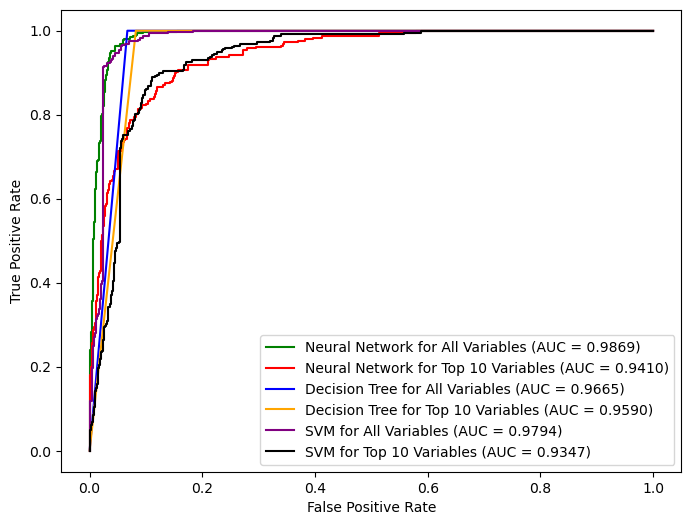

In [160]:
# plot the combined ROC curve
plt.figure(figsize=(8, 6))

plt.plot(fpr_nn, tpr_nn, color='green', label='Neural Network for All Variables (AUC = %0.4f)' % roc_auc_nn)

plt.plot(fpr_nn_top10, tpr_nn_top10, color='red', label='Neural Network for Top 10 Variables (AUC = %0.4f)' % roc_auc_nn_top10)

plt.plot(fpr_dt, tpr_dt, color='blue', label='Decision Tree for All Variables (AUC = %0.4f)' % roc_auc_dt)

plt.plot(fpr_dt_top10, tpr_dt_top10, color='orange', label='Decision Tree for Top 10 Variables (AUC = %0.4f)' % roc_auc_dt_top10)

plt.plot(fpr_svm, tpr_svm, color='purple', label='SVM for All Variables (AUC = %0.4f)' % roc_auc_svm)

plt.plot(fpr_svm_top10, tpr_svm_top10, color='black', label='SVM for Top 10 Variables (AUC = %0.4f)' % roc_auc_svm_top10)



plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### b) Plotting all ROC curves into seperate plots for further visualisation

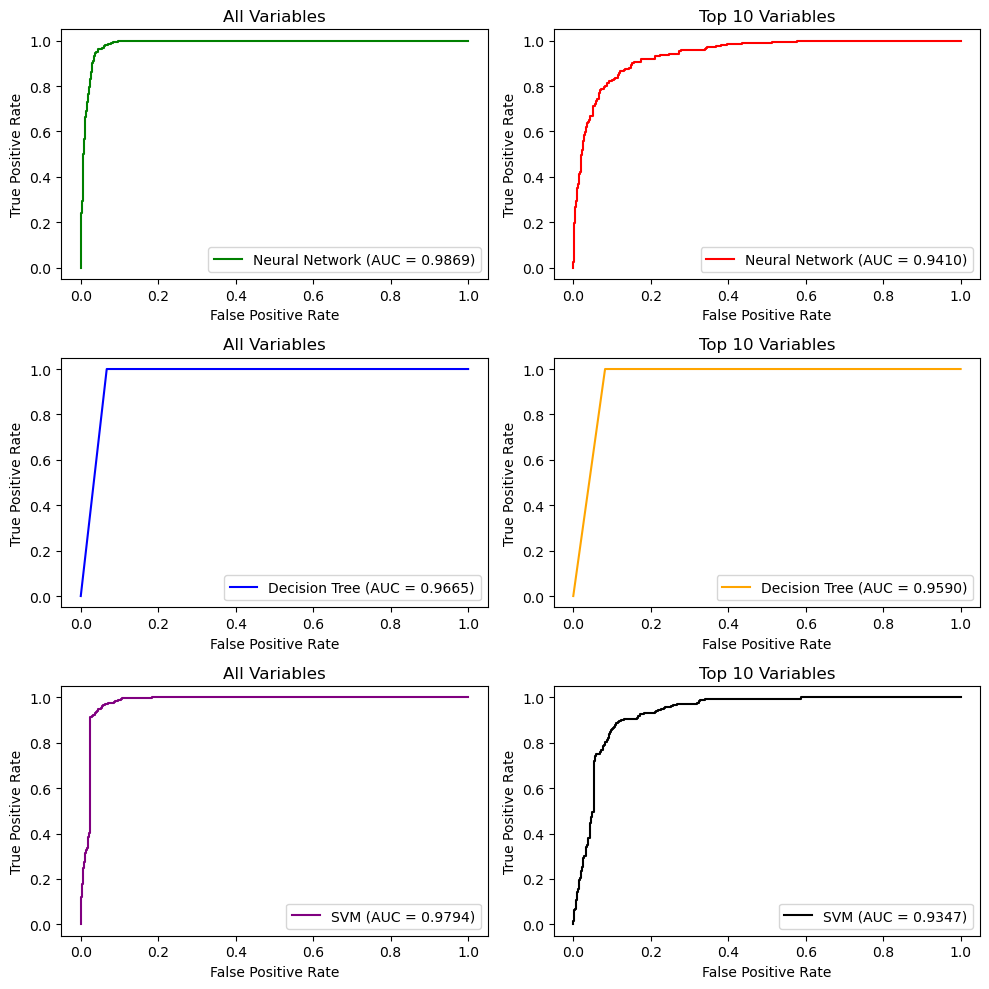

In [161]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# plot ROC curve for neural network with all variables
axes[0, 0].plot(fpr_nn, tpr_nn, color='green', label='Neural Network (AUC = %0.4f)' % roc_auc_nn)
axes[0, 0].set_title('All Variables')

# plot ROC curve for neural network with top 10 variables
axes[0, 1].plot(fpr_nn_top10, tpr_nn_top10, color='red', label='Neural Network (AUC = %0.4f)' % roc_auc_nn_top10)
axes[0, 1].set_title('Top 10 Variables')

# plot ROC curve for decision tree with all variables
axes[1, 0].plot(fpr_dt, tpr_dt, color='blue', label='Decision Tree (AUC = %0.4f)' % roc_auc_dt)
axes[1, 0].set_title('All Variables')

# plot ROC curve for decision tree with top 10 variables
axes[1, 1].plot(fpr_dt_top10, tpr_dt_top10, color='orange', label='Decision Tree (AUC = %0.4f)' % roc_auc_dt_top10)
axes[1, 1].set_title('Top 10 Variables')

# plot ROC curve for decision tree with all variables
axes[2, 0].plot(fpr_svm, tpr_svm, color='purple', label='SVM (AUC = %0.4f)' % roc_auc_svm)
axes[2, 0].set_title('All Variables')

# plot ROC curve for decision tree with top 10 variables
axes[2, 1].plot(fpr_svm_top10, tpr_svm_top10, color='black', label='SVM (AUC = %0.4f)' % roc_auc_svm_top10)
axes[2, 1].set_title('Top 10 Variables')

# add axis labels and legends
for ax in axes.flat:
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()

# adjust layout and spacing
fig.tight_layout()
plt.show()


### 2. Classification Report of each model

The following are explanations for the various metrics shown on the classfication report. For the purpose of comparison, we will focus on the accuracy for each model.

Precision: The precision is the ratio of true positive predictions to the total number of positive predictions. It measures the accuracy of positive predictions. A high precision indicates that the model has a low false positive rate.

Recall: The recall is the ratio of true positive predictions to the total number of actual positive instances. It measures the completeness of positive predictions. A high recall indicates that the model has a low false negative rate.

F1-score: The F1-score is the harmonic mean of precision and recall. It combines both metrics into a single score that balances precision and recall.

Support: The support is the number of actual occurrences of each class in the test set.

Accuracy: The accuracy is the ratio of correct predictions to the total number of predictions.

Macro/micro averages: The macro average calculates the metric for each class and then takes the average. The micro average calculates the metric globally by counting the total true positives, false negatives, and false positives.

##### a) Neural Network for All Variables

In [162]:
print(nn_report)

              precision    recall  f1-score   support

           0     0.9951    0.9104    0.9508      1328
           1     0.9165    0.9954    0.9543      1312

    accuracy                         0.9527      2640
   macro avg     0.9558    0.9529    0.9526      2640
weighted avg     0.9560    0.9527    0.9526      2640



##### b) Neural Network for Top 10 Variables

In [163]:
print(nn_report_top10)

              precision    recall  f1-score   support

           0     0.8144    0.9217    0.8647      1328
           1     0.9085    0.7873    0.8436      1312

    accuracy                         0.8549      2640
   macro avg     0.8615    0.8545    0.8542      2640
weighted avg     0.8612    0.8549    0.8542      2640



##### c) Decision Tree for All Variables

In [164]:
print(dt_report)

              precision    recall  f1-score   support

           0     1.0000    0.9330    0.9653      1328
           1     0.9365    1.0000    0.9672      1312

    accuracy                         0.9663      2640
   macro avg     0.9682    0.9665    0.9663      2640
weighted avg     0.9684    0.9663    0.9663      2640



##### d) Decision Tree for Top 10 Variables

In [165]:
print(dt_report_top10)

              precision    recall  f1-score   support

           0     1.0000    0.9179    0.9572      1328
           1     0.9233    1.0000    0.9601      1312

    accuracy                         0.9587      2640
   macro avg     0.9616    0.9590    0.9587      2640
weighted avg     0.9619    0.9587    0.9587      2640



##### e) SVM for All Variables

In [166]:
print(svm_report)

              precision    recall  f1-score   support

           0     0.9767    0.9134    0.9440      1328
           1     0.9177    0.9779    0.9469      1312

    accuracy                         0.9455      2640
   macro avg     0.9472    0.9456    0.9454      2640
weighted avg     0.9474    0.9455    0.9454      2640



##### f) SVM for Top 10 Variables

In [167]:
print(svm_report_top10)

              precision    recall  f1-score   support

           0     0.8996    0.8434    0.8706      1328
           1     0.8509    0.9047    0.8770      1312

    accuracy                         0.8739      2640
   macro avg     0.8752    0.8740    0.8738      2640
weighted avg     0.8754    0.8739    0.8738      2640

